# Klasifikasi InSet Lexicon

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import pytz 
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import ast
import string
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from googletrans import Translator

In [2]:
df = pd.read_csv('data_tweet_cleaning_gedebage3.csv', encoding='utf8')
df.head(10)

,text,lang,author.location,geo.coordinates.coordinates,geo.country,geo.full_name,count,clean_tweet,remove_http,remove_hastag,Tweety,tweet_clean
0,@haechivee aku kepikiran aljabar sih,in,homophobic dni,NaN,NaN,NaN,1,aku kepikiran aljabar sih,aku kepikiran aljabar sih,aku kepikiran aljabar sih,"['aku', 'pikir', 'aljabar', 'sih']",aku pikir aljabar sih
1,[Cm] coba sebutin matkul apa yang ga pernah ma...,in,Rules👇,NaN,NaN,NaN,1,[Cm] coba sebutin matkul apa yang ga pernah ma...,Cm coba sebutin matkul apa yang ga pernah masu...,Cm coba sebutin matkul apa yang ga pernah masu...,"['coba', 'sebutin', 'matkul', 'apa', 'pernah',...",coba sebutin matkul apa pernah masuk otak kali...
2,LeBron James eligió al quinteto histórico de l...,es,"Cusco, Peru",NaN,NaN,NaN,1,LeBron James eligió al quinteto histórico de l...,LeBron James eligi al quinteto hist rico de lo...,LeBron James eligi al quinteto hist rico de lo...,"['lebron', 'james', 'eligi', 'al', 'quinteto',...",lebron james eligi al quinteto hist rico de lo...
3,Wisata Religi di Tengah Danau Buatan. Inilah M...,in,"Cimahi Selatan, Indonesia",NaN,NaN,NaN,1,Wisata Religi di Tengah Danau Buatan. Inilah M...,Wisata Religi di Tengah Danau Buatan Inilah Ma...,Wisata Religi di Tengah Danau Buatan Inilah Ma...,"['wisata', 'religi', 'tengah', 'danau', 'buat'...",wisata religi tengah danau buat ini masjid apu...
4,@toptobs @mirgasoeprapto @_LeJacob Ke siang lo...,in,"Bandung, Jawa Barat",NaN,NaN,NaN,1,"Ke siang loading ka GBLA, stay di ditu sigana...",Ke siang loading ka GBLA stay di ditu sigana s...,Ke siang loading ka GBLA stay di ditu sigana s...,"['siang', 'loading', 'ka', 'gbla', 'stay', 'di...",siang loading ka gbla stay ditu sigana malam
5,kembali ke kota bandung!!\ndi tempat yang sama...,in,Indonesia,NaN,NaN,NaN,1,kembali ke kota bandung!!\ndi tempat yang sama...,kembali ke kota bandung ndi tempat yang sama d...,kembali ke kota bandung ndi tempat yang sama d...,"['kota', 'bandung', 'ndi', 'tempat', 'sama', '...",kota bandung ndi tempat sama bulan sama lawan ...
6,"day twooo, Al Jabbar https://t.co/qPUKdfAB7u",en,NaN,NaN,NaN,NaN,1,"day twooo, Al Jabbar https://t.co/qPUKdfAB7u",day twooo Al Jabbar,day twooo Al Jabbar,"['day', 'twooo', 'al', 'jabbar']",day twooo al jabbar
7,●Al Jabbar:The compeller\n To get rid of any a...,en,"Lahore, Pakistan",NaN,NaN,NaN,1,●Al Jabbar:The compeller\n To get rid of any a...,Al Jabbar The compeller n To get rid of any ad...,Al Jabbar The compeller n To get rid of any ad...,"['al', 'jabbar', 'the', 'compeller', 'n', 'to'...",al jabbar the compeller n to get rid of any ad...
8,"Momen Para Pemain Timnas Senior , Shin Tae Yon...",in,NaN,NaN,NaN,NaN,1,"Momen Para Pemain Timnas Senior , Shin Tae Yon...",Momen Para Pemain Timnas Senior Shin Tae Yong ...,Momen Para Pemain Timnas Senior Shin Tae Yong ...,"['momen', 'main', 'timnas', 'senior', 'shin', ...",momen main timnas senior shin tae yong staff l...
9,He knows that your heart is \nHurting and he k...,en,NaN,NaN,NaN,NaN,1,He knows that your heart is \nHurting and he k...,He knows that your heart is nHurting and he kn...,He knows that your heart is nHurting and he kn...,"['he', 'knows', 'that', 'your', 'heart', 'is',...",he knows that your heart is nhurting and he kn...


In [3]:
#hapus kolom tidak diperlukan
del df['clean_tweet']
df.head()

,text,lang,author.location,geo.coordinates.coordinates,geo.country,geo.full_name,count,remove_http,remove_hastag,Tweety,tweet_clean
0,@haechivee aku kepikiran aljabar sih,in,homophobic dni,NaN,NaN,NaN,1,aku kepikiran aljabar sih,aku kepikiran aljabar sih,"['aku', 'pikir', 'aljabar', 'sih']",aku pikir aljabar sih
1,[Cm] coba sebutin matkul apa yang ga pernah ma...,in,Rules👇,NaN,NaN,NaN,1,Cm coba sebutin matkul apa yang ga pernah masu...,Cm coba sebutin matkul apa yang ga pernah masu...,"['coba', 'sebutin', 'matkul', 'apa', 'pernah',...",coba sebutin matkul apa pernah masuk otak kali...
2,LeBron James eligió al quinteto histórico de l...,es,"Cusco, Peru",NaN,NaN,NaN,1,LeBron James eligi al quinteto hist rico de lo...,LeBron James eligi al quinteto hist rico de lo...,"['lebron', 'james', 'eligi', 'al', 'quinteto',...",lebron james eligi al quinteto hist rico de lo...
3,Wisata Religi di Tengah Danau Buatan. Inilah M...,in,"Cimahi Selatan, Indonesia",NaN,NaN,NaN,1,Wisata Religi di Tengah Danau Buatan Inilah Ma...,Wisata Religi di Tengah Danau Buatan Inilah Ma...,"['wisata', 'religi', 'tengah', 'danau', 'buat'...",wisata religi tengah danau buat ini masjid apu...
4,@toptobs @mirgasoeprapto @_LeJacob Ke siang lo...,in,"Bandung, Jawa Barat",NaN,NaN,NaN,1,Ke siang loading ka GBLA stay di ditu sigana s...,Ke siang loading ka GBLA stay di ditu sigana s...,"['siang', 'loading', 'ka', 'gbla', 'stay', 'di...",siang loading ka gbla stay ditu sigana malam


In [4]:
#hapus kolom tidak diperlukan
del df['remove_http']
df.head()

,text,lang,author.location,geo.coordinates.coordinates,geo.country,geo.full_name,count,remove_hastag,Tweety,tweet_clean
0,@haechivee aku kepikiran aljabar sih,in,homophobic dni,NaN,NaN,NaN,1,aku kepikiran aljabar sih,"['aku', 'pikir', 'aljabar', 'sih']",aku pikir aljabar sih
1,[Cm] coba sebutin matkul apa yang ga pernah ma...,in,Rules👇,NaN,NaN,NaN,1,Cm coba sebutin matkul apa yang ga pernah masu...,"['coba', 'sebutin', 'matkul', 'apa', 'pernah',...",coba sebutin matkul apa pernah masuk otak kali...
2,LeBron James eligió al quinteto histórico de l...,es,"Cusco, Peru",NaN,NaN,NaN,1,LeBron James eligi al quinteto hist rico de lo...,"['lebron', 'james', 'eligi', 'al', 'quinteto',...",lebron james eligi al quinteto hist rico de lo...
3,Wisata Religi di Tengah Danau Buatan. Inilah M...,in,"Cimahi Selatan, Indonesia",NaN,NaN,NaN,1,Wisata Religi di Tengah Danau Buatan Inilah Ma...,"['wisata', 'religi', 'tengah', 'danau', 'buat'...",wisata religi tengah danau buat ini masjid apu...
4,@toptobs @mirgasoeprapto @_LeJacob Ke siang lo...,in,"Bandung, Jawa Barat",NaN,NaN,NaN,1,Ke siang loading ka GBLA stay di ditu sigana s...,"['siang', 'loading', 'ka', 'gbla', 'stay', 'di...",siang loading ka gbla stay ditu sigana malam


In [5]:
#hapus kolom tidak diperlukan
del df['remove_hastag']
df.head()

,text,lang,author.location,geo.coordinates.coordinates,geo.country,geo.full_name,count,Tweety,tweet_clean
0,@haechivee aku kepikiran aljabar sih,in,homophobic dni,NaN,NaN,NaN,1,"['aku', 'pikir', 'aljabar', 'sih']",aku pikir aljabar sih
1,[Cm] coba sebutin matkul apa yang ga pernah ma...,in,Rules👇,NaN,NaN,NaN,1,"['coba', 'sebutin', 'matkul', 'apa', 'pernah',...",coba sebutin matkul apa pernah masuk otak kali...
2,LeBron James eligió al quinteto histórico de l...,es,"Cusco, Peru",NaN,NaN,NaN,1,"['lebron', 'james', 'eligi', 'al', 'quinteto',...",lebron james eligi al quinteto hist rico de lo...
3,Wisata Religi di Tengah Danau Buatan. Inilah M...,in,"Cimahi Selatan, Indonesia",NaN,NaN,NaN,1,"['wisata', 'religi', 'tengah', 'danau', 'buat'...",wisata religi tengah danau buat ini masjid apu...
4,@toptobs @mirgasoeprapto @_LeJacob Ke siang lo...,in,"Bandung, Jawa Barat",NaN,NaN,NaN,1,"['siang', 'loading', 'ka', 'gbla', 'stay', 'di...",siang loading ka gbla stay ditu sigana malam


In [6]:
#hapus kolom tidak diperlukan
del df['Tweety']
df.head()

,text,lang,author.location,geo.coordinates.coordinates,geo.country,geo.full_name,count,tweet_clean
0,@haechivee aku kepikiran aljabar sih,in,homophobic dni,NaN,NaN,NaN,1,aku pikir aljabar sih
1,[Cm] coba sebutin matkul apa yang ga pernah ma...,in,Rules👇,NaN,NaN,NaN,1,coba sebutin matkul apa pernah masuk otak kali...
2,LeBron James eligió al quinteto histórico de l...,es,"Cusco, Peru",NaN,NaN,NaN,1,lebron james eligi al quinteto hist rico de lo...
3,Wisata Religi di Tengah Danau Buatan. Inilah M...,in,"Cimahi Selatan, Indonesia",NaN,NaN,NaN,1,wisata religi tengah danau buat ini masjid apu...
4,@toptobs @mirgasoeprapto @_LeJacob Ke siang lo...,in,"Bandung, Jawa Barat",NaN,NaN,NaN,1,siang loading ka gbla stay ditu sigana malam


In [7]:
len(df)

295243

#### Extra cleaning

In [8]:
len(df[df['tweet_clean'].isnull()==True])

37

In [9]:
pd.set_option('display.max_colwidth', None)
df[df['tweet_clean'].isnull()==True]['text']

33                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       https://t.co/xwBAfTVHw3
4144                                                                                                                                                                                                                                                                                                                                                                                                                   

In [10]:
df = df.dropna(subset=['tweet_clean'])
df = df.reset_index(drop=True)

In [11]:
df.isnull().sum()

text                                0
lang                                0
author.location                 77611
geo.coordinates.coordinates    282048
geo.country                    275530
geo.full_name                  275517
count                               0
tweet_clean                         0
dtype: int64

In [12]:
clean_text = df['tweet_clean'].copy()

In [13]:
pd.set_option('display.max_colwidth', 100)
clean_text.tail(15)

295191                    bala smlm happy anniv and new year with dessy mayang at summarecon mall serpong pic
295192                                                          malam punya cerita summarecon mal serpong sms
295193                                                                   happy new years sumarecon mall bekas
295194                                                         scientia square park summarecon digital centre
295195    banyak kegunaanya tu kalau aljabar contoh berapa liter solar butuh bis tiap minggu dasar jarak t...
295196                            suatu bentuk saji upa huruf wakil bilang blm tahu siapa bljr aljabar mtmtka
295197                                                                     dhan aljabar matematika maksud apa
295198          sisa semalem maksih yaaa nikmatin macet bareng baru kali w agus at sumarecon mall serpong pic
295199                                                              happy new year summarecon mal serpong sms
295200    

In [14]:
def repair_exaggeration(x):
    word_tokens = word_tokenize(x)
    new_x =''
    for i in word_tokens:
        if (i =='psbb'):
            new = re.sub(r'(\w)\1\1+',r'\1\1',i)
            new_x = new_x +new+' '
        elif(i =='psb'):
            new = 'psbb'
            new_x = new_x +new+' '
        else:
            new = re.sub(r'(\w)\1\1\1+',r'\1',i)
            new_x = new_x +new+' '
    return new_x

def del_word(x,key_list):
    n = len(key_list)
    word_tokens = word_tokenize(x)
    new_x =''
    for word in word_tokens:
        if word not in key_list:
            new_x = new_x+word+' '
    return new_x

def clean_tweets(tweet):
   # nltk.download('stopwords')
    my_file = open("cleaning_source/combined_stop_words.txt", "r")
    content = my_file.read()
    stop_words = content.split("\n")
    file_2  = open("cleaning_source/update_combined_slang_words.txt", "r")
    content2 = file_2.read()
    slang_words = ast.literal_eval(content2)
    my_file.close()
    file_2.close()

    tweet = tweet.lower()
    #after tweepy preprocessing the colon left remain after removing mentions
    #or RT sign in the beginning of the tweet
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)

    #remove emojis from tweet
    #tweet = emoji_pattern.sub(r'', tweet)
    
    #remove punctuation manually
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    
    #remove tags
    tweet=re.sub("&lt;/?.*?&gt;","&lt;&gt;",tweet)
    
    #remove digits and special chars
    tweet=re.sub("(\\d|\\W)+"," ",tweet)

    #remove other symbol from tweet
    tweet = re.sub(r'â', '', tweet)
    tweet = re.sub(r'€', '', tweet)
    tweet = re.sub(r'¦', '', tweet)

    word_tokens = word_tokenize(tweet)
    for w in word_tokens:
        if w in slang_words.keys():
            word_tokens[word_tokens.index(w)] = slang_words[w]

    #filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []

    #looping through conditions
    for w in word_tokens:
        #check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in string.punctuation:
            filtered_tweet.append(w.lower())
    return ' '.join(filtered_tweet)

def count_words(x):
    words = word_tokenize(x)
    n=len(words)
    return n

In [15]:
clean_text_exag = clean_text.apply(lambda x: repair_exaggeration(x))

In [16]:
clean_text_exag.tail(15)

295191                   bala smlm happy anniv and new year with dessy mayang at summarecon mall serpong pic 
295192                                                         malam punya cerita summarecon mal serpong sms 
295193                                                                  happy new years sumarecon mall bekas 
295194                                                        scientia square park summarecon digital centre 
295195    banyak kegunaanya tu kalau aljabar contoh berapa liter solar butuh bis tiap minggu dasar jarak t...
295196                           suatu bentuk saji upa huruf wakil bilang blm tahu siapa bljr aljabar mtmtka 
295197                                                                    dhan aljabar matematika maksud apa 
295198         sisa semalem maksih yaaa nikmatin macet bareng baru kali w agus at sumarecon mall serpong pic 
295199                                                             happy new year summarecon mal serpong sms 
295200    

In [17]:
re_clean = clean_text_exag.apply(lambda x: clean_tweets(x))

In [18]:
re_clean.tail(15)

295191    bala smlm bahagia anniv and new year with dessy mayang at summarecon mall serpong pic
295192                                                  malam cerita summarecon mal serpong sms
295193                                                   bahagia new years sumarecon mall bekas
295194                                           scientia square park summarecon digital centre
295195                    kegunaanya tu aljabar contoh liter solar butuh bis dasar jarak tempuh
295196                                   bentuk saji upa huruf wakil bilang bljr aljabar mtmtka
295197                                                           dhan aljabar matematika maksud
295198      sisa semalem maksih yaaa nikmatin macet bareng w agus at sumarecon mall serpong pic
295199                                              bahagia new year summarecon mal serpong sms
295200                                                  sisa semalem summarecon mal serpong sms
295201                                  

In [19]:
df['tweet_clean'] = re_clean

In [20]:
df['word_length'] = df['tweet_clean'].apply(lambda x:count_words(x))

In [21]:
df['word_length'].value_counts().sort_index()

0       314
1      3501
2     12527
3     18282
4     20289
      ...  
58        8
59        5
60        1
66        1
67        1
Name: word_length, Length: 63, dtype: int64

In [22]:
df = df.drop(df[df['word_length']==0].index,axis=0)
df = df.reset_index(drop=True)

#### Word Dictionary

In [23]:
word_dict = {}
for i in range(0,len(df['tweet_clean'])):
    sentence = df['tweet_clean'][i]
    word_token = word_tokenize(sentence)
    for j in word_token:
        if j not in word_dict:
            word_dict[j] = 1
        else:
            word_dict[j] += 1

In [24]:
len(word_dict)

166262

In [25]:
len({k:v for (k,v) in word_dict.items() if v < 4})

126335

#### Klasifikasi

In [26]:
#import lexicon, and remove negation words from lexicon, the lexicon is a combination from several sources below, that combined together, and include swear words which has the most negative score
negasi = ['bukan','tidak','ga','gk']
lexicon = pd.read_csv('modified_full_lexicon.csv')
lexicon = lexicon.drop(lexicon[(lexicon['word'] == 'bukan')
                               |(lexicon['word'] == 'tidak')
                               |(lexicon['word'] == 'ga')|(lexicon['word'] == 'gk') ].index,axis=0)
lexicon = lexicon.reset_index(drop=True)

In [27]:
len(lexicon)

10248

In [28]:
lexicon.head(10)

,word,weight,number_of_words
0,hai,3,1
1,merekam,2,1
2,ekstensif,3,1
3,paripurna,1,1
4,detail,2,1
5,pernik,3,1
6,belas,2,1
7,welas,4,1
8,kabung,1,1
9,rahayu,4,1


In [29]:
lexicon_word = lexicon['word'].to_list()
lexicon_num_words = lexicon['number_of_words']

In [30]:
len(lexicon_word)

10248

Checking if there is words in dictionary that does not included in the lexicon

In [31]:
ns_words = []
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for word in word_dict.keys():
    if word not in lexicon_word:
        kata_dasar = stemmer.stem(word)
        if kata_dasar not in lexicon_word:
            ns_words.append(word)
len(ns_words)

162477

Let's take a look what kind of words they are, lets start with some words that have many occurences as this most likely not a type case

In [32]:
len({k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3)) })

36853

In [33]:
ns_words_list = {k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3))}

It turns out that the words that is not included in lexicon, are the one that not have signifance sentiment

In [324]:
sort_orders = sorted(ns_words_list.items(), key=lambda x: x[1], reverse=True)
sort_orders=sort_orders[0:100]
for i in sort_orders:
    print(i[0], i[1])

summarecon 85773
gbla 65116
aljabar 53341
gedebage 41141
bandung 30928
mall 23586
serpong 20221
persib 16681
stadion 16306
sumarecon 14759
al 14115
a 12560
at 10919
kakak 10398
jalan 10324
mal 10248
amp 10237
bage 9622
to 8908
kota 8882
jabbar 8291
and 7720
s 7072
of 6809
sih 6799
lurah 6781
in 6433
pakai 6422
pasar 6242
tidak 6112
min 6062
m 5999
jam 5899
matematika 5799
laut 5664
adik 5641
giat 5576
with 5390
kan 5266
i 5168
bobotoh 5078
is 5072
bukan 4858
tol 4746
for 4629
b 4578
gading 4500
jakarta 4482
rancabolang 4481
si 4424
bangun 4411
vs 4404
you 4398
nu 4318
indonesia 4293
teu 4197
linear 4154
on 4018
sms 3988
jl 3967
x 3959
na 3816
camat 3753
nonton 3683
daerah 3672
kak 3662
rancanumpang 3566
tuh 3430
perempuan 3417
cimincrang 3324
tiket 3290
mtk 3267
barat 3235
fungsi 3223
paling 3220
abdul 3173
kelapa 3150
via 3150
materi 3113
kalkulus 3089
wkwk 3046
nama 3021
deh 3018
cluster 3017
it 2984
liga 2983
warga 2891
laku 2891
aman 2867
tangerang 2829
we 2817
bikin 2798
cimol 268

In [35]:
word_to_plot = df['tweet_clean'].copy()

In [36]:
word_to_plot_1 = word_to_plot.apply(lambda x: del_word(x,negasi))

creating word cloud

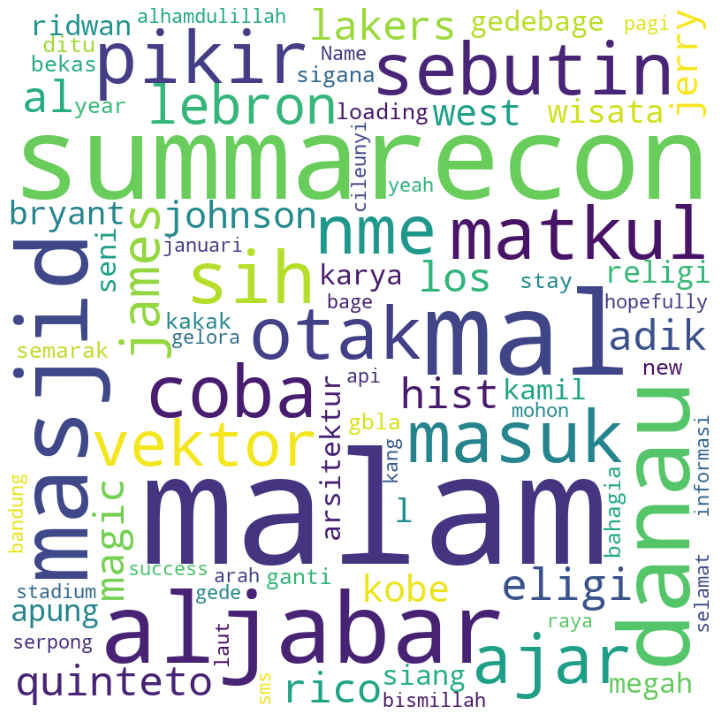

In [37]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', max_words = 1000
                      , min_font_size = 20).generate(str(word_to_plot_1))
#plot the word cloud
fig = plt.figure(figsize = (13,13), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [38]:
lexicon['number_of_words'].value_counts()

1    9536
2     686
3      24
4       2
Name: number_of_words, dtype: int64

In [39]:
'pekerti' in word_dict

True

In [40]:
'budi baik' in lexicon_word

True

calculating the sentiment of words by mathing them to the lexicon while also creating the bag of words matrix

In [41]:
sencol =[]
senrow =np.array([])
nsen = 0
factory = StemmerFactory()
stemmer = factory.create_stemmer()
sentiment_list = []
# function to write the word's sentiment if it is founded
def found_word(ind,words,word,sen,sencol,sentiment,add):
    # if it is already included in the bag of words matrix, then just increase the value
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
    #if not, than add new word
        sencol.append(word)
        sen.append(1)
        add += 1
    #if there is a negation word before it, the sentiment would be the negation of it's sentiment
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]
    
    return sen,sencol,sentiment,add
            
# checking every words, if they are appear in the lexicon, and then calculate their sentiment if they do
for i in range(len(df)):
    nsen = senrow.shape[0]
    words = word_tokenize(df['tweet_clean'][i])
    sentiment = 0 
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]
    
    for word in words:
        ind = words.index(word)
        # check whether they are included in the lexicon
        if word in lexicon_word :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        else:
        # if not, then check the root word
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
        # if still negative, try to match the combination of words with the adjacent words
            elif(n_words>1):
                if ind-1>-1:
                    back_1    = words[ind-1]+' '+word
                    if (back_1 in lexicon_word):
                        sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
                    elif(ind-2>-1):
                        back_2    = words[ind-2]+' '+back_1
                        if back_2 in lexicon_word:
                            sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
    # if there is new word founded, then expand the matrix
    if add>0:  
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
    # if there isn't then just update the old matrix
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))
        
    sentiment_list.append(sentiment)

In [42]:
len(sentiment_list)

294892

In [43]:
print(senrow.shape[0])

294892


constructing the data frame that contain bag of words and the sentiments that have been calculated before

In [44]:
sencol.append('sentiment')
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
df_sen = pd.DataFrame(sentiment_data,columns = sencol)

In [45]:
df_sen.head(10)

,pikir,coba,masuk,otak,ajar,religi,masjid,karya,seni,arsitektur,...,serong,kesohor,perkutut,atas,gamat,sumbing,dogol,cengkerama,ngaceng,sentiment
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,2,1,1,1,...,0,0,0,0,0,0,0,0,0,20
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df_sen.to_csv('data_sentimen_perword_gedebage3.csv',encoding='utf8', index=False)

lets see if the sentiment is correct by looking at the original text

In [47]:
cek_df = pd.DataFrame([])
cek_df['text'] = df['text'].copy()
cek_df['sentiment']  = df_sen['sentiment'].copy()

In [48]:
cek_df.head(10)

,text,sentiment
0,@haechivee aku kepikiran aljabar sih,1
1,[Cm] coba sebutin matkul apa yang ga pernah masuk ke otak kalian walau udah belajar\nMe : aljaba...,3
2,"LeBron James eligió al quinteto histórico de los Lakers: Magic Johnson, Jerry West, Kobe Bryant,...",0
3,"Wisata Religi di Tengah Danau Buatan. Inilah Masjid Apung Gedebage, Karya Seni Arsitektur Ridwan...",20
4,"@toptobs @mirgasoeprapto @_LeJacob Ke siang loading ka GBLA, stay di ditu sigana sampai malam.",-1
5,"kembali ke kota bandung!!\ndi tempat yang sama, di bulan yang sama dengan lawan yang sama, 4 tah...",6
6,"day twooo, Al Jabbar https://t.co/qPUKdfAB7u",0
7,●Al Jabbar:The compeller\n To get rid of any addiction\n●Al Qahar:The ever dominating\nTo get th...,5
8,"Momen Para Pemain Timnas Senior , Shin Tae Yong dan Staff Pelatih menyanyikan Lagu Tanah Airku d...",12
9,He knows that your heart is \nHurting and he know how to fix \nIs. As he is Al Jabbar. That one ...,0


In [49]:
cek_df.to_csv('data_sentimen_textcleanonly_gedebage3.csv',encoding='utf8', index=False)

In [50]:
df['sentiment'] = df_sen['sentiment'].copy()
df.head()

,text,lang,author.location,geo.coordinates.coordinates,geo.country,geo.full_name,count,tweet_clean,word_length,sentiment
0,@haechivee aku kepikiran aljabar sih,in,homophobic dni,NaN,NaN,NaN,1,pikir aljabar sih,3,1
1,[Cm] coba sebutin matkul apa yang ga pernah masuk ke otak kalian walau udah belajar\nMe : aljaba...,in,Rules👇,NaN,NaN,NaN,1,coba sebutin matkul masuk otak ajar nme aljabar vektor,9,3
2,"LeBron James eligió al quinteto histórico de los Lakers: Magic Johnson, Jerry West, Kobe Bryant,...",es,"Cusco, Peru",NaN,NaN,NaN,1,lebron james eligi al quinteto hist rico adik los lakers magic johnson jerry west kobe bryant l ...,31,0
3,"Wisata Religi di Tengah Danau Buatan. Inilah Masjid Apung Gedebage, Karya Seni Arsitektur Ridwan...",in,"Cimahi Selatan, Indonesia",NaN,NaN,NaN,1,wisata religi danau masjid apung gedebage karya seni arsitektur ridwan kamil bukan masjid megah ...,18,20
4,"@toptobs @mirgasoeprapto @_LeJacob Ke siang loading ka GBLA, stay di ditu sigana sampai malam.",in,"Bandung, Jawa Barat",NaN,NaN,NaN,1,siang loading kakak gbla stay ditu sigana malam,8,-1


In [51]:
#compound Score lexicon based
df.loc[df['sentiment'] < 0, 'klasifikasi'] = 'Negatif'
df.loc[df['sentiment'] == 0, 'klasifikasi'] = 'Netral'
df.loc[df['sentiment'] > 0, 'klasifikasi'] = 'Positif'

In [52]:
df.head()

,text,lang,author.location,geo.coordinates.coordinates,geo.country,geo.full_name,count,tweet_clean,word_length,sentiment,klasifikasi
0,@haechivee aku kepikiran aljabar sih,in,homophobic dni,NaN,NaN,NaN,1,pikir aljabar sih,3,1,Positif
1,[Cm] coba sebutin matkul apa yang ga pernah masuk ke otak kalian walau udah belajar\nMe : aljaba...,in,Rules👇,NaN,NaN,NaN,1,coba sebutin matkul masuk otak ajar nme aljabar vektor,9,3,Positif
2,"LeBron James eligió al quinteto histórico de los Lakers: Magic Johnson, Jerry West, Kobe Bryant,...",es,"Cusco, Peru",NaN,NaN,NaN,1,lebron james eligi al quinteto hist rico adik los lakers magic johnson jerry west kobe bryant l ...,31,0,Netral
3,"Wisata Religi di Tengah Danau Buatan. Inilah Masjid Apung Gedebage, Karya Seni Arsitektur Ridwan...",in,"Cimahi Selatan, Indonesia",NaN,NaN,NaN,1,wisata religi danau masjid apung gedebage karya seni arsitektur ridwan kamil bukan masjid megah ...,18,20,Positif
4,"@toptobs @mirgasoeprapto @_LeJacob Ke siang loading ka GBLA, stay di ditu sigana sampai malam.",in,"Bandung, Jawa Barat",NaN,NaN,NaN,1,siang loading kakak gbla stay ditu sigana malam,8,-1,Negatif


In [53]:
df['klasifikasi'].value_counts()

Positif    149525
Negatif     81571
Netral      63796
Name: klasifikasi, dtype: int64

In [54]:
df.to_csv('data_tweet_InSet_gedebage3.csv',encoding='utf8', index=False)

# Naive Bayes (InSet Lexicon)

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import operator
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [56]:
klas_tweet_inset = df.copy()
klas_tweet_inset.head()

,text,lang,author.location,geo.coordinates.coordinates,geo.country,geo.full_name,count,tweet_clean,word_length,sentiment,klasifikasi
0,@haechivee aku kepikiran aljabar sih,in,homophobic dni,NaN,NaN,NaN,1,pikir aljabar sih,3,1,Positif
1,[Cm] coba sebutin matkul apa yang ga pernah masuk ke otak kalian walau udah belajar\nMe : aljaba...,in,Rules👇,NaN,NaN,NaN,1,coba sebutin matkul masuk otak ajar nme aljabar vektor,9,3,Positif
2,"LeBron James eligió al quinteto histórico de los Lakers: Magic Johnson, Jerry West, Kobe Bryant,...",es,"Cusco, Peru",NaN,NaN,NaN,1,lebron james eligi al quinteto hist rico adik los lakers magic johnson jerry west kobe bryant l ...,31,0,Netral
3,"Wisata Religi di Tengah Danau Buatan. Inilah Masjid Apung Gedebage, Karya Seni Arsitektur Ridwan...",in,"Cimahi Selatan, Indonesia",NaN,NaN,NaN,1,wisata religi danau masjid apung gedebage karya seni arsitektur ridwan kamil bukan masjid megah ...,18,20,Positif
4,"@toptobs @mirgasoeprapto @_LeJacob Ke siang loading ka GBLA, stay di ditu sigana sampai malam.",in,"Bandung, Jawa Barat",NaN,NaN,NaN,1,siang loading kakak gbla stay ditu sigana malam,8,-1,Negatif


In [57]:
klas_tweet_inset["klasifikasi"].value_counts()

Positif    149525
Negatif     81571
Netral      63796
Name: klasifikasi, dtype: int64

In [58]:
klas_tweet_inset['tweet_clean'].iloc[0]

'pikir aljabar sih'

In [59]:
klas_tweet_inset.loc[klas_tweet_inset['klasifikasi'] == 'Positif', 'nilai_klasifikasi'] = 1
klas_tweet_inset.loc[klas_tweet_inset['klasifikasi'] == 'Netral', 'nilai_klasifikasi'] = 0
klas_tweet_inset.loc[klas_tweet_inset['klasifikasi'] == 'Negatif', 'nilai_klasifikasi'] = -1
klas_tweet_inset.head()

,text,lang,author.location,geo.coordinates.coordinates,geo.country,geo.full_name,count,tweet_clean,word_length,sentiment,klasifikasi,nilai_klasifikasi
0,@haechivee aku kepikiran aljabar sih,in,homophobic dni,NaN,NaN,NaN,1,pikir aljabar sih,3,1,Positif,1.0
1,[Cm] coba sebutin matkul apa yang ga pernah masuk ke otak kalian walau udah belajar\nMe : aljaba...,in,Rules👇,NaN,NaN,NaN,1,coba sebutin matkul masuk otak ajar nme aljabar vektor,9,3,Positif,1.0
2,"LeBron James eligió al quinteto histórico de los Lakers: Magic Johnson, Jerry West, Kobe Bryant,...",es,"Cusco, Peru",NaN,NaN,NaN,1,lebron james eligi al quinteto hist rico adik los lakers magic johnson jerry west kobe bryant l ...,31,0,Netral,0.0
3,"Wisata Religi di Tengah Danau Buatan. Inilah Masjid Apung Gedebage, Karya Seni Arsitektur Ridwan...",in,"Cimahi Selatan, Indonesia",NaN,NaN,NaN,1,wisata religi danau masjid apung gedebage karya seni arsitektur ridwan kamil bukan masjid megah ...,18,20,Positif,1.0
4,"@toptobs @mirgasoeprapto @_LeJacob Ke siang loading ka GBLA, stay di ditu sigana sampai malam.",in,"Bandung, Jawa Barat",NaN,NaN,NaN,1,siang loading kakak gbla stay ditu sigana malam,8,-1,Negatif,-1.0


In [277]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(klas_tweet_inset.tweet_clean, klas_tweet_inset.nilai_klasifikasi, test_size = 0.25)

In [278]:
v = CountVectorizer()
X_train_count2 = v.fit_transform(X_train2.values)

In [279]:
model = MultinomialNB()
model.fit(X_train_count2, Y_train2)
MultinomialNB()

MultinomialNB()

In [280]:
X_test_count2 = v.transform(X_test2)

In [281]:
model.score(X_test_count2,Y_test2)

0.7106873024700568

[[12720   949  6584]
 [ 1719  5220  9095]
 [ 1544  1438 34454]]


c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


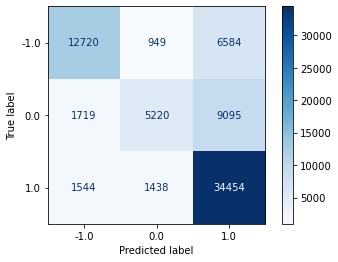

In [282]:
disp = plot_confusion_matrix(model, X_test_count2, Y_test2,cmap=plt.cm.Blues)
print(disp.confusion_matrix)

plt.show();

#### Tuning Model

In [283]:
#create a new column with words and word counts
vectorizer = CountVectorizer()
analyzer = vectorizer.build_analyzer()

def wordcounts(s):
    c = {}
    if analyzer(s):
        d = {}
        w = vectorizer.fit_transform([s]).toarray()
        vc = vectorizer.vocabulary_
        for k,v in vc.items():
            d[v]=k # d -> index:word 
        for index,i in enumerate(w[0]):
            c[d[index]] = i # c -> word:count
    return  c

klas_tweet_inset['word_counts'] = klas_tweet_inset['tweet_clean'].apply(wordcounts)
klas_tweet_inset.head()

,text,lang,author.location,geo.coordinates.coordinates,geo.country,geo.full_name,count,tweet_clean,word_length,sentiment,klasifikasi,nilai_klasifikasi,word_counts
0,@haechivee aku kepikiran aljabar sih,in,homophobic dni,NaN,NaN,NaN,1,pikir aljabar sih,3,1,Positif,1.0,"{'aljabar': 1, 'pikir': 1, 'sih': 1}"
1,[Cm] coba sebutin matkul apa yang ga pernah masuk ke otak kalian walau udah belajar\nMe : aljaba...,in,Rules👇,NaN,NaN,NaN,1,coba sebutin matkul masuk otak ajar nme aljabar vektor,9,3,Positif,1.0,"{'ajar': 1, 'aljabar': 1, 'coba': 1, 'masuk': 1, 'matkul': 1, 'nme': 1, 'otak': 1, 'sebutin': 1,..."
2,"LeBron James eligió al quinteto histórico de los Lakers: Magic Johnson, Jerry West, Kobe Bryant,...",es,"Cusco, Peru",NaN,NaN,NaN,1,lebron james eligi al quinteto hist rico adik los lakers magic johnson jerry west kobe bryant l ...,31,0,Netral,0.0,"{'abdul': 1, 'adik': 1, 'al': 1, 'bryant': 1, 'cierto': 1, 'eligi': 1, 'en': 1, 'est': 1, 'hist'..."
3,"Wisata Religi di Tengah Danau Buatan. Inilah Masjid Apung Gedebage, Karya Seni Arsitektur Ridwan...",in,"Cimahi Selatan, Indonesia",NaN,NaN,NaN,1,wisata religi danau masjid apung gedebage karya seni arsitektur ridwan kamil bukan masjid megah ...,18,20,Positif,1.0,"{'apung': 1, 'arsitektur': 1, 'banjir': 1, 'bukan': 1, 'danau': 2, 'gedebage': 1, 'kamil': 1, 'k..."
4,"@toptobs @mirgasoeprapto @_LeJacob Ke siang loading ka GBLA, stay di ditu sigana sampai malam.",in,"Bandung, Jawa Barat",NaN,NaN,NaN,1,siang loading kakak gbla stay ditu sigana malam,8,-1,Negatif,-1.0,"{'ditu': 1, 'gbla': 1, 'kakak': 1, 'loading': 1, 'malam': 1, 'siang': 1, 'sigana': 1, 'stay': 1}"


In [284]:
first_tweet = klas_tweet_inset['word_counts'].iloc[0]
sorted_by_value = sorted(first_tweet.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_by_value )

[('aljabar', 1), ('pikir', 1), ('sih', 1)]


In [285]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [286]:
stop = set(stopwords.words("english"))
klas_tweet_inset['tweet_clean'] = klas_tweet_inset['tweet_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
klas_tweet_inset.head()

,text,lang,author.location,geo.coordinates.coordinates,geo.country,geo.full_name,count,tweet_clean,word_length,sentiment,klasifikasi,nilai_klasifikasi,word_counts
0,@haechivee aku kepikiran aljabar sih,in,homophobic dni,NaN,NaN,NaN,1,pikir aljabar sih,3,1,Positif,1.0,"{'aljabar': 1, 'pikir': 1, 'sih': 1}"
1,[Cm] coba sebutin matkul apa yang ga pernah masuk ke otak kalian walau udah belajar\nMe : aljaba...,in,Rules👇,NaN,NaN,NaN,1,coba sebutin matkul masuk otak ajar nme aljabar vektor,9,3,Positif,1.0,"{'ajar': 1, 'aljabar': 1, 'coba': 1, 'masuk': 1, 'matkul': 1, 'nme': 1, 'otak': 1, 'sebutin': 1,..."
2,"LeBron James eligió al quinteto histórico de los Lakers: Magic Johnson, Jerry West, Kobe Bryant,...",es,"Cusco, Peru",NaN,NaN,NaN,1,lebron james eligi al quinteto hist rico adik los lakers magic johnson jerry west kobe bryant l ...,31,0,Netral,0.0,"{'abdul': 1, 'adik': 1, 'al': 1, 'bryant': 1, 'cierto': 1, 'eligi': 1, 'en': 1, 'est': 1, 'hist'..."
3,"Wisata Religi di Tengah Danau Buatan. Inilah Masjid Apung Gedebage, Karya Seni Arsitektur Ridwan...",in,"Cimahi Selatan, Indonesia",NaN,NaN,NaN,1,wisata religi danau masjid apung gedebage karya seni arsitektur ridwan kamil bukan masjid megah ...,18,20,Positif,1.0,"{'apung': 1, 'arsitektur': 1, 'banjir': 1, 'bukan': 1, 'danau': 2, 'gedebage': 1, 'kamil': 1, 'k..."
4,"@toptobs @mirgasoeprapto @_LeJacob Ke siang loading ka GBLA, stay di ditu sigana sampai malam.",in,"Bandung, Jawa Barat",NaN,NaN,NaN,1,siang loading kakak gbla stay ditu sigana malam,8,-1,Negatif,-1.0,"{'ditu': 1, 'gbla': 1, 'kakak': 1, 'loading': 1, 'malam': 1, 'siang': 1, 'sigana': 1, 'stay': 1}"


In [305]:
X_latih2, X_uji2, Y_latih2, Y_uji2 = train_test_split(klas_tweet_inset.tweet_clean, klas_tweet_inset.nilai_klasifikasi, test_size = 0.25)

In [306]:
v = CountVectorizer()
X_latih_count2 = v.fit_transform(X_latih2.values)
model = MultinomialNB()
model.fit(X_latih_count2, Y_latih2)
X_uji_count2 = v.transform(X_uji2)
model.score(X_uji_count2,Y_uji2)

0.7195719110725283

[[13009   939  6455]
 [ 1648  5346  8842]
 [ 1500  1290 34694]]


c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


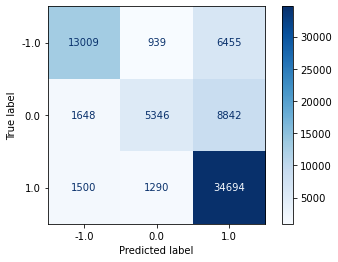

In [307]:
disp = plot_confusion_matrix(model, X_uji_count2, Y_uji2,cmap=plt.cm.Blues)
print(disp.confusion_matrix)

plt.show();

In [308]:
Y_predict2 = model.fit(X_latih_count2, Y_latih2).predict(X_uji_count2)
print(classification_report(Y_uji2, Y_predict2))

              precision    recall  f1-score   support

        -1.0       0.81      0.64      0.71     20403
         0.0       0.71      0.34      0.46     15836
         1.0       0.69      0.93      0.79     37484

    accuracy                           0.72     73723
   macro avg       0.73      0.63      0.65     73723
weighted avg       0.73      0.72      0.70     73723



# Visualisasi - InSet

In [309]:
klas_tweet_inset.head()

,text,lang,author.location,geo.coordinates.coordinates,geo.country,geo.full_name,count,tweet_clean,word_length,sentiment,klasifikasi,nilai_klasifikasi,word_counts
0,@haechivee aku kepikiran aljabar sih,in,homophobic dni,NaN,NaN,NaN,1,pikir aljabar sih,3,1,Positif,1.0,"{'aljabar': 1, 'pikir': 1, 'sih': 1}"
1,[Cm] coba sebutin matkul apa yang ga pernah masuk ke otak kalian walau udah belajar\nMe : aljaba...,in,Rules👇,NaN,NaN,NaN,1,coba sebutin matkul masuk otak ajar nme aljabar vektor,9,3,Positif,1.0,"{'ajar': 1, 'aljabar': 1, 'coba': 1, 'masuk': 1, 'matkul': 1, 'nme': 1, 'otak': 1, 'sebutin': 1,..."
2,"LeBron James eligió al quinteto histórico de los Lakers: Magic Johnson, Jerry West, Kobe Bryant,...",es,"Cusco, Peru",NaN,NaN,NaN,1,lebron james eligi al quinteto hist rico adik los lakers magic johnson jerry west kobe bryant l ...,31,0,Netral,0.0,"{'abdul': 1, 'adik': 1, 'al': 1, 'bryant': 1, 'cierto': 1, 'eligi': 1, 'en': 1, 'est': 1, 'hist'..."
3,"Wisata Religi di Tengah Danau Buatan. Inilah Masjid Apung Gedebage, Karya Seni Arsitektur Ridwan...",in,"Cimahi Selatan, Indonesia",NaN,NaN,NaN,1,wisata religi danau masjid apung gedebage karya seni arsitektur ridwan kamil bukan masjid megah ...,18,20,Positif,1.0,"{'apung': 1, 'arsitektur': 1, 'banjir': 1, 'bukan': 1, 'danau': 2, 'gedebage': 1, 'kamil': 1, 'k..."
4,"@toptobs @mirgasoeprapto @_LeJacob Ke siang loading ka GBLA, stay di ditu sigana sampai malam.",in,"Bandung, Jawa Barat",NaN,NaN,NaN,1,siang loading kakak gbla stay ditu sigana malam,8,-1,Negatif,-1.0,"{'ditu': 1, 'gbla': 1, 'kakak': 1, 'loading': 1, 'malam': 1, 'siang': 1, 'sigana': 1, 'stay': 1}"


In [310]:
data_tweet_graph = klas_tweet_inset.copy()
data_tweet_graph.head()

,text,lang,author.location,geo.coordinates.coordinates,geo.country,geo.full_name,count,tweet_clean,word_length,sentiment,klasifikasi,nilai_klasifikasi,word_counts
0,@haechivee aku kepikiran aljabar sih,in,homophobic dni,NaN,NaN,NaN,1,pikir aljabar sih,3,1,Positif,1.0,"{'aljabar': 1, 'pikir': 1, 'sih': 1}"
1,[Cm] coba sebutin matkul apa yang ga pernah masuk ke otak kalian walau udah belajar\nMe : aljaba...,in,Rules👇,NaN,NaN,NaN,1,coba sebutin matkul masuk otak ajar nme aljabar vektor,9,3,Positif,1.0,"{'ajar': 1, 'aljabar': 1, 'coba': 1, 'masuk': 1, 'matkul': 1, 'nme': 1, 'otak': 1, 'sebutin': 1,..."
2,"LeBron James eligió al quinteto histórico de los Lakers: Magic Johnson, Jerry West, Kobe Bryant,...",es,"Cusco, Peru",NaN,NaN,NaN,1,lebron james eligi al quinteto hist rico adik los lakers magic johnson jerry west kobe bryant l ...,31,0,Netral,0.0,"{'abdul': 1, 'adik': 1, 'al': 1, 'bryant': 1, 'cierto': 1, 'eligi': 1, 'en': 1, 'est': 1, 'hist'..."
3,"Wisata Religi di Tengah Danau Buatan. Inilah Masjid Apung Gedebage, Karya Seni Arsitektur Ridwan...",in,"Cimahi Selatan, Indonesia",NaN,NaN,NaN,1,wisata religi danau masjid apung gedebage karya seni arsitektur ridwan kamil bukan masjid megah ...,18,20,Positif,1.0,"{'apung': 1, 'arsitektur': 1, 'banjir': 1, 'bukan': 1, 'danau': 2, 'gedebage': 1, 'kamil': 1, 'k..."
4,"@toptobs @mirgasoeprapto @_LeJacob Ke siang loading ka GBLA, stay di ditu sigana sampai malam.",in,"Bandung, Jawa Barat",NaN,NaN,NaN,1,siang loading kakak gbla stay ditu sigana malam,8,-1,Negatif,-1.0,"{'ditu': 1, 'gbla': 1, 'kakak': 1, 'loading': 1, 'malam': 1, 'siang': 1, 'sigana': 1, 'stay': 1}"


In [311]:
data_tweet_graph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294892 entries, 0 to 294891
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   text                         294892 non-null  object 
 1   lang                         294892 non-null  object 
 2   author.location              217422 non-null  object 
 3   geo.coordinates.coordinates  13158 non-null   object 
 4   geo.country                  19674 non-null   object 
 5   geo.full_name                19687 non-null   object 
 6   count                        294892 non-null  int64  
 7   tweet_clean                  294892 non-null  object 
 8   word_length                  294892 non-null  int64  
 9   sentiment                    294892 non-null  int64  
 10  klasifikasi                  294892 non-null  object 
 11  nilai_klasifikasi            294892 non-null  float64
 12  word_counts                  294892 non-null  object 
dtyp

In [312]:
data_tweet_graph['klasifikasi'].value_counts()

Positif    149525
Negatif     81571
Netral      63796
Name: klasifikasi, dtype: int64

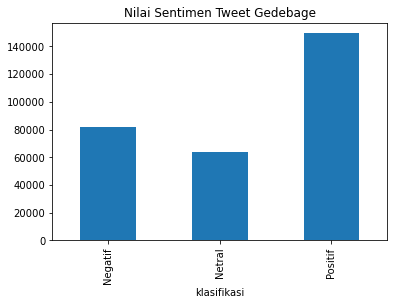

In [313]:
data_tweet_graph.groupby(['klasifikasi']).size().plot(kind='bar').set_title('Nilai Sentimen Tweet Gedebage')
plt.show()

In [314]:
word_to_plot_positif = data_tweet_graph.loc[data_tweet_graph['klasifikasi'] == 'Positif', 'tweet_clean'].copy()

In [315]:
word_to_plot_negatif = data_tweet_graph.loc[data_tweet_graph['klasifikasi'] == 'Negatif', 'tweet_clean'].copy()

In [316]:
word_to_plot_netral = data_tweet_graph.loc[data_tweet_graph['klasifikasi'] == 'Netral', 'tweet_clean'].copy()

In [317]:
word_to_plot_positif

0                                                                                           pikir aljabar sih
1                                                      coba sebutin matkul masuk otak ajar nme aljabar vektor
3         wisata religi danau masjid apung gedebage karya seni arsitektur ridwan kamil bukan masjid megah ...
5                kota bandung ndi lawan menang lawan gbla non sunday lets repeat glory inibandungbukanjakarta
7         al jabbar compeller get rid addiction al qahar ever dominating nto get thru difficult situation ...
                                                         ...                                                 
294887                                                               semarak malam ganti summarecon mal bekas
294888                               bahagia new year hopefully success raya malam summarecon mal serpong sms
294889                                           alhamdulillah bismillah yeah gelora bandung laut api stadium
294890    

In [318]:
word_to_plot_negatif

4                                                             siang loading kakak gbla stay ditu sigana malam
28                            turun fungsi aljabar matematika wajib kelas xi na thread studytwt written shasa
30                                          sieta tanggal kakak gbla moal nyak wang sered katengah lapang euy
35        slingbag gemoy arhan dino marselino gbla tasya farasya tasyi deddy mingyu malam hoshi bethesun j...
36        maudy ready yahhh fly summarecon bekas wariacikarang shemalejaksel wariabekasi shemalejakarta sh...
                                                         ...                                                 
294876                                        way, sedang di jalan w summarecon bekas janji w mal niat nunggu
294877                              bala smlm bahagia anniv new year dessy mayang summarecon mall serpong pic
294881                                  kegunaanya tu aljabar contoh liter solar butuh bis dasar jarak tempuh
294884    

In [319]:
word_to_plot_netral

2         lebron james eligi al quinteto hist rico adik los lakers magic johnson jerry west kobe bryant l ...
6                                                                                         day twooo al jabbar
9                                       knows heart nhurting know fix nis al jabbar one fix everything broken
12                                                                                                  wl reward
13                                             si doll gbla bis bukan rantis nklo mentalita gbla bis markotop
                                                         ...                                                 
294860             khadija gbla survivor female genital mutilation turned anger action protect girls risk fgm
294863                    sembah langgan apotek kimia farma rancabolang bandung kimiafarmaexperiencce newyear
294864                    sembah langgan apotek kimia farma rancabolang bandung kimiafarmaexperiencce newyear
294873    

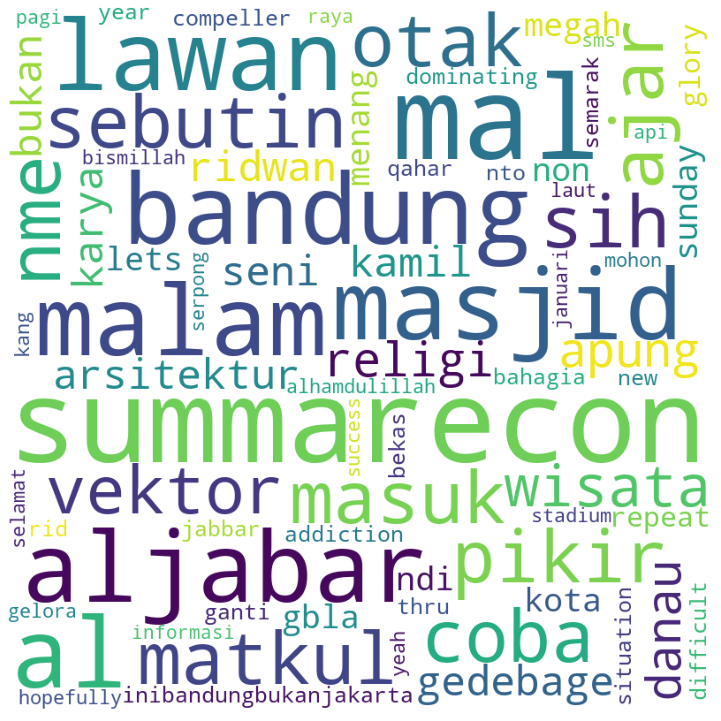

In [331]:
wordcloud_pos = WordCloud(width = 800, height = 800, background_color = 'white', max_words = 1000
                      , min_font_size = 20).generate(str(word_to_plot_positif))
#plot the word cloud
fig = plt.figure(figsize = (13,13), facecolor = None)
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.show()

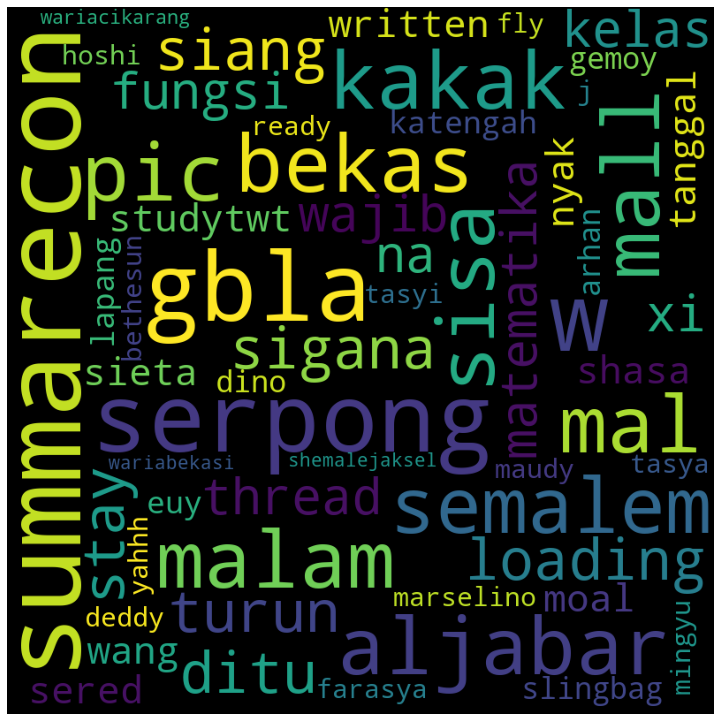

In [333]:
wordcloud_neg = WordCloud(width = 800, height = 800, background_color = 'black', max_words = 1000
                      , min_font_size = 20).generate(str(word_to_plot_negatif))
#plot the word cloud
fig = plt.figure(figsize = (13,13), facecolor = None)
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.show()

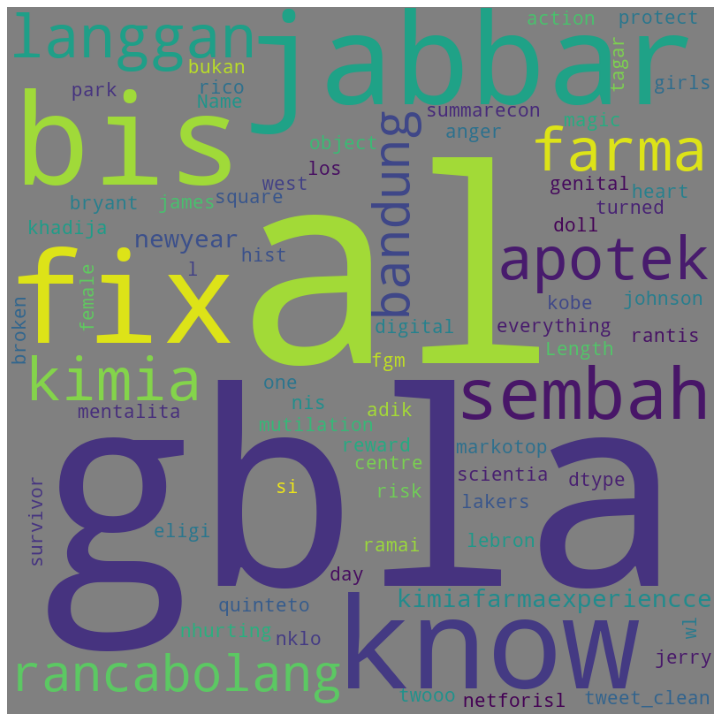

In [335]:
wordcloud_net = WordCloud(width = 800, height = 800, background_color = 'grey', max_words = 1000
                      , min_font_size = 20).generate(str(word_to_plot_netral))
#plot the word cloud
fig = plt.figure(figsize = (13,13), facecolor = None)
plt.imshow(wordcloud_net)
plt.axis('off')
plt.show()